**Auto Dataset**
1. mpg: miles per gallon
2. cylinders: Number of cylinders between 4 and 8
3. displacement: Engine displacement (cu. inches)
4. horsepower: Engine horsepower
5. weight: Vehicle weight (lbs.)
6. acceleration: Time to accelerate from 0 to 60 mph (sec.)
7. year: Model year (modulo 100)
8. origin: Origin of car (1. American, 2. European, 3. Japanese)
9. name: Vehicle name

In [448]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [449]:
auto = pd.read_csv('auto.csv')
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [450]:
auto.shape

(397, 9)

In [451]:
# display how many non values of the dataset and what is the type of each column
auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           397 non-null    float64
 1   cylinders     397 non-null    int64  
 2   displacement  397 non-null    float64
 3   horsepower    397 non-null    object 
 4   weight        397 non-null    int64  
 5   acceleration  397 non-null    float64
 6   year          397 non-null    int64  
 7   origin        397 non-null    int64  
 8   name          397 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.0+ KB


In [452]:
auto.describe()

,mpg,cylinders,displacement,weight,acceleration,year,origin
count,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000
mean,23.515869,5.458438,193.532746,2970.261965,15.555668,75.994962,1.574307
std,7.825804,1.701577,104.379583,847.904119,2.749995,3.690005,0.802549
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.000000,2223.000000,13.800000,73.000000,1.000000
50%,23.000000,4.000000,146.000000,2800.000000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3609.000000,17.100000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [453]:
for i in auto.columns:
    print(i)
    print(auto[i].unique(),"\n\n")

mpg
[18.  15.  16.  17.  14.  24.  22.  21.  27.  26.  25.  10.  11.   9.
 28.  19.  12.  13.  23.  30.  31.  35.  20.  29.  32.  33.  17.5 15.5
 14.5 22.5 24.5 18.5 29.5 26.5 16.5 31.5 36.  25.5 33.5 20.5 30.5 21.5
 43.1 36.1 32.8 39.4 19.9 19.4 20.2 19.2 25.1 20.6 20.8 18.6 18.1 17.7
 27.5 27.2 30.9 21.1 23.2 23.8 23.9 20.3 21.6 16.2 19.8 22.3 17.6 18.2
 16.9 31.9 34.1 35.7 27.4 25.4 34.2 34.5 31.8 37.3 28.4 28.8 26.8 41.5
 38.1 32.1 37.2 26.4 24.3 19.1 34.3 29.8 31.3 37.  32.2 46.6 27.9 40.8
 44.3 43.4 36.4 44.6 40.9 33.8 32.7 23.7 23.6 32.4 26.6 25.8 23.5 39.1
 39.  35.1 32.3 37.7 34.7 34.4 29.9 33.7 32.9 31.6 28.1 30.7 24.2 22.4
 34.  38.  44. ] 


cylinders
[8 4 6 3 5] 


displacement
[307.  350.  318.  304.  302.  429.  454.  440.  455.  390.  383.  340.
 400.  113.  198.  199.  200.   97.  110.  107.  104.  121.  360.  140.
  98.  232.  225.  250.  351.  258.  122.  116.   79.   88.   71.   72.
  91.   97.5  70.  120.   96.  108.  155.   68.  114.  156.   76.   83.
  90.  231. 

In [454]:
auto.nunique()

mpg             129
cylinders         5
displacement     82
horsepower       94
weight          350
acceleration     95
year             13
origin            3
name            304
dtype: int64

Engine horsepower is quantitative as for each car their is number of horsepower

And we can see their is only 3 unique values of origin column, it represent origin of car (1. American, 2. European, 3. Japanese)

In [455]:
#auto['horsepower'] = auto['horsepower'].astype(int)

**Error** I faced error because there is ? in the horsepower column, so I am changing this to average number of horsepower from column 

In [456]:
# Convert 'horsepower' to numeric, if errors in some rows than to NaN for that row's value
# error = 'coerce', any value that cannot be converted to a number (such as a string or a character like '?')
auto['horsepower'] = pd.to_numeric(auto['horsepower'], errors='coerce')

In [457]:
# how many nan values are in horsepower column
auto['horsepower'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 397 entries, 0 to 396
Series name: horsepower
Non-Null Count  Dtype  
--------------  -----  
392 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


In [458]:
# fill nan values with mean value of horsepower column
auto['horsepower'].fillna(np.mean(auto['horsepower']), inplace=True)

In [459]:
# convert the type of object str to int for horsepower column
auto['horsepower'] = auto['horsepower'].astype(int)

In [460]:
# convert 1, 2, and 3 with their origin name in the origin column
replacement = {1: 'American', 2: 'European', 3: 'Japanese'}
auto['origin'].replace(replacement, inplace = True)

**(a) Which of the predictors are quantitative, and which are qualitative?**

In [461]:
auto.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower        int64
weight            int64
acceleration    float64
year              int64
origin           object
name             object
dtype: object

In [462]:
auto['origin'].unique()

array(['American', 'Japanese', 'European'], dtype=object)

**Quantitative**
1. mpg
2. cylinders
3. displacement
4. horsepower
5. weight 
6. acceleration
7. year

**Qualitative**
1. origin
2. name


**(b) What is the range of each quantitative predictor? You can answer this using the min() and max() methods in numpy.**

In [463]:
def range_of_quantitative_variable(df):
    # print the range of min to max of each quantitative columns
    for i in df.columns:
        if df[i].dtype!=object:
            print("Range of " + i + " variable is {} to {}".format(np.min(df[i]), np.max(df[i])))

In [464]:
range_of_quantitative_variable(auto)

Range of mpg variable is 9.0 to 46.6
Range of cylinders variable is 3 to 8
Range of displacement variable is 68.0 to 455.0
Range of horsepower variable is 46 to 230
Range of weight variable is 1613 to 5140
Range of acceleration variable is 8.0 to 24.8
Range of year variable is 70 to 82


**(c) What is the mean and standard deviation of each quantitative predictor?**

In [465]:
# mean value of each quantitative variable
auto.describe().loc['mean']

mpg               23.515869
cylinders          5.458438
displacement     193.532746
horsepower       104.463476
weight          2970.261965
acceleration      15.555668
year              75.994962
Name: mean, dtype: float64

In [466]:
# standard deviation of value of each quantitative variable
auto.describe().loc['std']

mpg               7.825804
cylinders         1.701577
displacement    104.379583
horsepower       38.247424
weight          847.904119
acceleration      2.749995
year              3.690005
Name: std, dtype: float64

**(d) Now remove the 10th through 85th observations. What is the range, mean, and standard deviation of each predictor in the subset of the data that remains?**

In [467]:
new_auto=auto.drop(labels=range(10,85), axis=0)

In [468]:
new_auto.shape

(322, 9)

In [469]:
# range of each quantitative variable left in the dataset
range_of_quantitative_variable(new_auto)

Range of mpg variable is 11.0 to 46.6
Range of cylinders variable is 3 to 8
Range of displacement variable is 68.0 to 455.0
Range of horsepower variable is 46 to 230
Range of weight variable is 1649 to 4997
Range of acceleration variable is 8.5 to 24.8
Range of year variable is 70 to 82


In [470]:
# mean value of each quantitative variable 
new_auto.describe().loc['mean']

mpg               24.409317
cylinders          5.378882
displacement     187.680124
horsepower       101.270186
weight          2936.807453
acceleration      15.700621
year              77.130435
Name: mean, dtype: float64

In [471]:
# standard deviation of value of each quantitative variable
new_auto.describe().loc['std']

mpg               7.913357
cylinders         1.657398
displacement    100.120925
horsepower       35.960237
weight          810.987533
acceleration      2.706436
year              3.131849
Name: std, dtype: float64

**Conclusion** range does not change for the variable after the observation from 10 to 85 but mean and standard deviation change 

**(e) Using the full dataset, investigate the predictors graphically, using scatterplots or other tools of your choice. Create some plots highlighting the relationships among the predictors. Comment on your findings.**

In [476]:
auto['cylinders'].value_counts()
# removing rows where cylinder = 3
auto = auto[auto['cylinders'] != 3]

As we have a range of no of cylinders between 4 and 8, and there is also cars with cylinder no 3, and also these are the less value we will simply remove these rows.

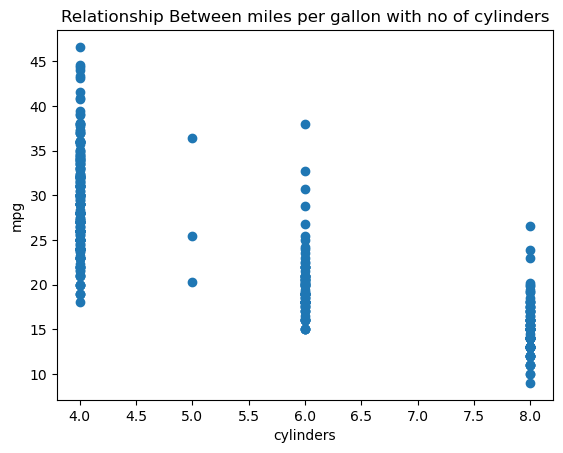

In [477]:
plt.scatter(auto['cylinders'], auto['mpg'])
plt.title('Relationship Between miles per gallon with no of cylinders')
plt.xlabel('cylinders')
plt.ylabel('mpg')
plt.show()

This suggest that mpg and no of cylinders has negative co-relation, when no of cylinder increases mpg decreases. 

Means higher number of cylinder car has less fuel efficient.

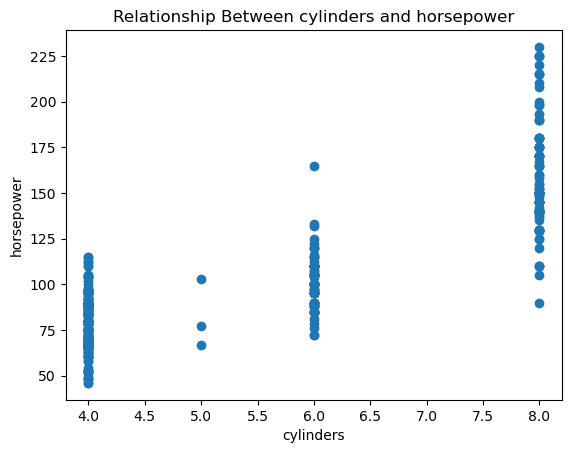

In [478]:
plt.scatter(auto['cylinders'], auto['horsepower'])
plt.title('Relationship Between cylinders and horsepower')
plt.xlabel('cylinders')
plt.ylabel('horsepower')
plt.show()

This suggest that horsepower and no of cylinders has positive co-relation.

Mostly all the time higher horsepower engine has higher number of cylinders.

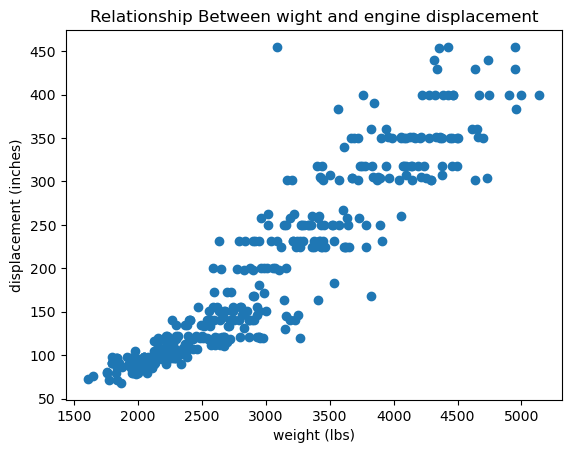

In [479]:
plt.scatter(auto['weight'], auto['displacement'])
plt.title('Relationship Between wight and engine displacement')
plt.xlabel('weight (lbs)')
plt.ylabel('displacement (inches)')
plt.show()

This suggest that weight of the car and engine displacement has positive co-relation.

When the wight of the car increase means the car is big so, the engine has more size.

array([[<Axes: xlabel='mpg', ylabel='mpg'>,
        <Axes: xlabel='cylinders', ylabel='mpg'>,
        <Axes: xlabel='weight', ylabel='mpg'>,
        <Axes: xlabel='displacement', ylabel='mpg'>],
       [<Axes: xlabel='mpg', ylabel='cylinders'>,
        <Axes: xlabel='cylinders', ylabel='cylinders'>,
        <Axes: xlabel='weight', ylabel='cylinders'>,
        <Axes: xlabel='displacement', ylabel='cylinders'>],
       [<Axes: xlabel='mpg', ylabel='weight'>,
        <Axes: xlabel='cylinders', ylabel='weight'>,
        <Axes: xlabel='weight', ylabel='weight'>,
        <Axes: xlabel='displacement', ylabel='weight'>],
       [<Axes: xlabel='mpg', ylabel='displacement'>,
        <Axes: xlabel='cylinders', ylabel='displacement'>,
        <Axes: xlabel='weight', ylabel='displacement'>,
        <Axes: xlabel='displacement', ylabel='displacement'>]],
      dtype=object)

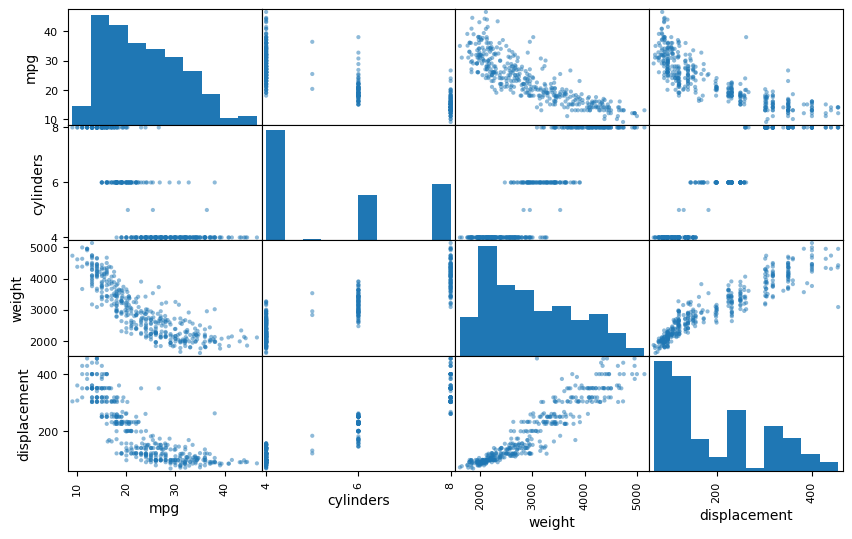

In [488]:
pd.plotting.scatter_matrix(auto[['mpg', 'cylinders','weight', 'displacement']], figsize=(10,6))

array([[<Axes: xlabel='mpg', ylabel='mpg'>,
        <Axes: xlabel='horsepower', ylabel='mpg'>,
        <Axes: xlabel='acceleration', ylabel='mpg'>,
        <Axes: xlabel='year', ylabel='mpg'>],
       [<Axes: xlabel='mpg', ylabel='horsepower'>,
        <Axes: xlabel='horsepower', ylabel='horsepower'>,
        <Axes: xlabel='acceleration', ylabel='horsepower'>,
        <Axes: xlabel='year', ylabel='horsepower'>],
       [<Axes: xlabel='mpg', ylabel='acceleration'>,
        <Axes: xlabel='horsepower', ylabel='acceleration'>,
        <Axes: xlabel='acceleration', ylabel='acceleration'>,
        <Axes: xlabel='year', ylabel='acceleration'>],
       [<Axes: xlabel='mpg', ylabel='year'>,
        <Axes: xlabel='horsepower', ylabel='year'>,
        <Axes: xlabel='acceleration', ylabel='year'>,
        <Axes: xlabel='year', ylabel='year'>]], dtype=object)

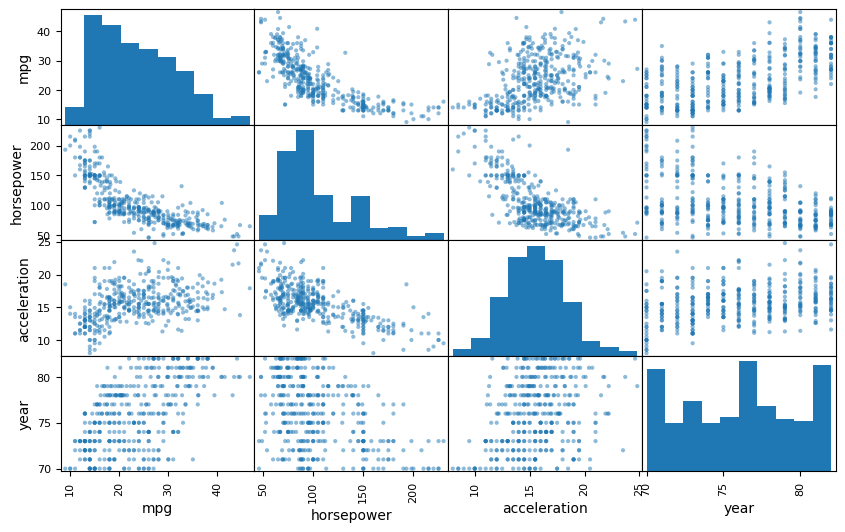

In [499]:
pd.plotting.scatter_matrix(auto[['mpg','horsepower','acceleration', 'year']], figsize=(10,6))

1. Most car are less fuel efficient, where as some cars are more fuel efficient
2. Some cars are with cylinder no is 5, because mostly average cars are in the marke with cylinder are 4, 6, and 8.
3. Size of engine for mostly car are less, because these are normal casual car, but some car has big engin like trucks, buses and sports cars. Similarly cars with less engine size has less horsepower. 
4. There are cars which takes less time to accelerate from 0 to 60 mph (sec.), means these are faster moving cars, in the mid there are casual cars which takes normal, but some are trucks, buses which takes more time to accerlate. 
5. Cars those engine size are big are less feul efficient where as cars with small engine size are more fuel efficient, similartly for their horsepower of the engine. 
6. Cars which takes more less time to accelerate from 0 to 60 mph are less fuel efficient, because these are faster moving cars, but in the middle there are casual car which takes normal, but some are trucks as well.
7. Cars which takes more accelaration are more in the number because their horsepower is less, but some are with higher number of horsepower. 
8. Cars with less horsepower are more fuel efficient, and with high are more fuel efficient.
9. Cars with less wight has small engine, and with more wight has big engine.

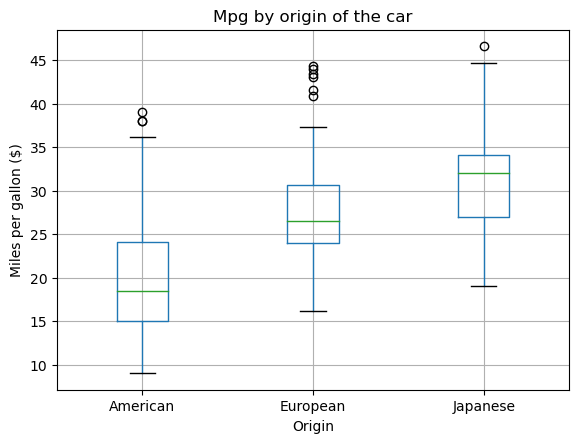

In [491]:
boxplot = auto.boxplot(column='mpg', by='origin')
boxplot.set_title('Mpg by origin of the car')
boxplot.set_xlabel('Origin')
boxplot.set_ylabel('Miles per gallon ($)')
plt.suptitle('')
plt.show()

Cars with the origin of America are less fuel efficient, but japanes car are more fuel efficient than the others.

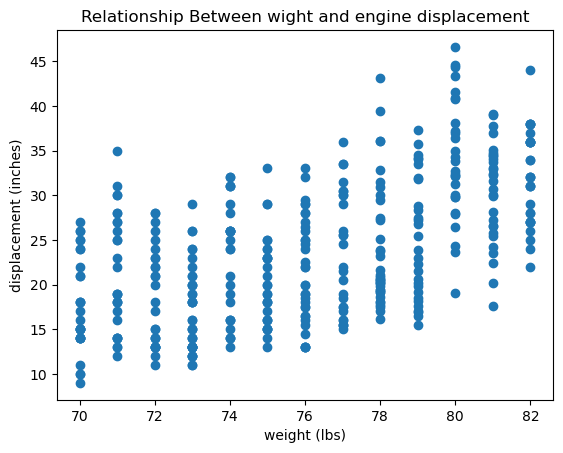

In [495]:
plt.scatter(auto['year'], auto['mpg'])
plt.title('Relationship Between wight and engine displacement')
plt.xlabel('weight (lbs)')
plt.ylabel('displacement (inches)')
plt.show()

array([[<Axes: xlabel='mpg', ylabel='mpg'>,
        <Axes: xlabel='year', ylabel='mpg'>,
        <Axes: xlabel='weight', ylabel='mpg'>,
        <Axes: xlabel='acceleration', ylabel='mpg'>],
       [<Axes: xlabel='mpg', ylabel='year'>,
        <Axes: xlabel='year', ylabel='year'>,
        <Axes: xlabel='weight', ylabel='year'>,
        <Axes: xlabel='acceleration', ylabel='year'>],
       [<Axes: xlabel='mpg', ylabel='weight'>,
        <Axes: xlabel='year', ylabel='weight'>,
        <Axes: xlabel='weight', ylabel='weight'>,
        <Axes: xlabel='acceleration', ylabel='weight'>],
       [<Axes: xlabel='mpg', ylabel='acceleration'>,
        <Axes: xlabel='year', ylabel='acceleration'>,
        <Axes: xlabel='weight', ylabel='acceleration'>,
        <Axes: xlabel='acceleration', ylabel='acceleration'>]],
      dtype=object)

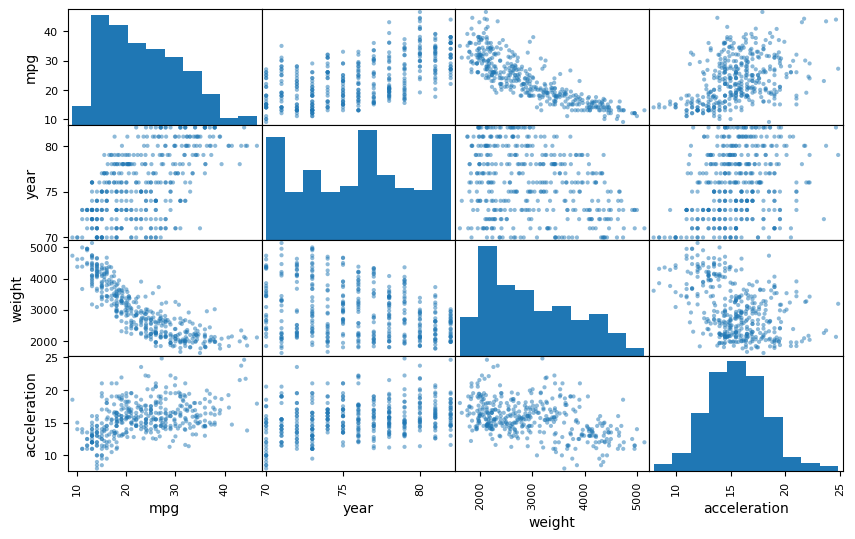

In [498]:
pd.plotting.scatter_matrix(auto[['mpg','year','weight', 'acceleration']], figsize=(10,6))

With the year wight of the car is decreasing, and miles per galon average are increasing, means car with higher number of model (year) are more fuel efficient, because they are improving the car, and also horsepower is decreasing, but acceleration are remaining same. 

**(f) Suppose that we wish to predict gas mileage (mpg) on the basis of the other variables. Do your plots suggest that any of the other variables might be useful in predicting mpg? Justify your answer.**


Yes, all the variables are necessary to predict the mpg except the year. 